In [9]:
import pandas as pd
import re
import rdkit
from rdkit import Chem
from rdkit.Chem import QED
from rdkit import Chem
from rdkit.Chem import RDConfig
import os
import sys
sys.path.append(os.path.join(RDConfig.RDContribDir, 'SA_Score'))
# now you can import sascore!
import sascorer
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem.Draw import rdDepictor

In [4]:
mols = {
    '65':'O=C(NC(CO)c1ccc(Cl)cc1)N1CCC(c2ccccc2)C1',
    '245':'CC1Cc2cc(Cl)ccc2N1Cc1ccc(C(=O)NCC(O)C2CC2)cc1',
    '158':'O=C(NCC1CCN(C(=O)c2cccc(Cl)c2)CC1)NC12CC3CC(CC(C3)C1)C2',
    '25':'O=C(NC1CCN(C(=O)c2ccccc2)C1)NC12CC3CC(CC(C3)C1)C2',
    '143':'CCC(CC)C(=O)N1CCC(NC(=O)Nc2ccc(F)c(C(F)(F)F)c2)CC1',
    '133':'CC#CC(=O)Nc1cccc(CNC(=O)NC2C3CC4CC(C3)CC2C4)c1',
    '45':'O=C1CCCN1Cc1ccc(CNC(=O)c2ccc(C(F)(F)F)cc2)cc1',
    '179':'CC(=O)NC1CCCC(C(=O)NCc2ccc(C(F)(F)F)cc2)C1',
    '204':'Cc1ccc(CNC(=O)C(C)N(C)C(=O)Nc2cccc(C(F)(F)F)c2)cc1',
    '142':'CCNC(=O)NC1CCC(C(=O)NCc2ccc(OC)cc2C(F)(F)F)CC1',
    '72':'CCNC(=O)NC1CCCC(C(=O)NCc2ccc(OC)cc2C(F)(F)F)C1',
    '23':'CC(CCc1ccccc1)NC(=O)Nc1cccc(Br)c1',
    '72':'CCNC(=O)NC1CCCC(C(=O)NCc2ccc(OC)cc2C(F)(F)F)C1',
    '221':'CCCC(=O)N1CCC(NC(=O)NC23CC4CC(CC(C4)C2)C3)CC1',
    '177':'CC(C)(CCc1ccccc1)CNC(=O)Nc1ccc(Cl)cc1',
    '238':'Cc1cccc(C)c1NC(=O)c1ccc(Cl)c(N2CCCC(C(=O)NCC(C)C)C2)c1'
}


for key,value in mols.items():
    smiles = value
    m=Chem.MolFromSmiles(smiles)
    qed=QED.qed(m)
    sas = sascorer.calculateScore(m)
    print(f"ID: {key}, QED: {round(qed,2)}, SAs: {round(sas,2)}")
    Draw.MolToFile(m,f'fig/{key}.svg')

ID: 65, QED: 0.89, SAs: 2.72
ID: 245, QED: 0.8, SAs: 2.96
ID: 158, QED: 0.74, SAs: 3.52
ID: 25, QED: 0.86, SAs: 3.85
ID: 143, QED: 0.72, SAs: 2.35
ID: 133, QED: 0.72, SAs: 3.8
ID: 45, QED: 0.86, SAs: 1.95
ID: 179, QED: 0.88, SAs: 2.77
ID: 204, QED: 0.8, SAs: 2.55
ID: 142, QED: 0.68, SAs: 2.27
ID: 72, QED: 0.68, SAs: 3.03
ID: 23, QED: 0.82, SAs: 2.16
ID: 221, QED: 0.82, SAs: 3.56
ID: 177, QED: 0.76, SAs: 1.89
ID: 238, QED: 0.65, SAs: 2.63


In [10]:
m.GetAromaticAtoms

<bound method GetAromaticAtoms of <rdkit.Chem.rdchem.Mol object at 0x7fa1a0a5fb30>>

In [1]:
smis = 'CC1=C(C(N2CCN(CC3=CC=C(OCC(F)(F)F)C=C3)CC2)=O)N(CC4=CN=C(C(NC5=CC=C(OC(F)(F)F)C=C5)=O)C=C4)N=N1'

In [6]:
sk = smis.replace("C","*").replace("O","*").replace("N","*").replace("F","*")

In [7]:
sk

'**1=*(*(*2***(**3=**=*(***(*)(*)*)*=*3)**2)=*)*(**4=**=*(*(**5=**=*(**(*)(*)*)*=*5)=*)*=*4)*=*1'

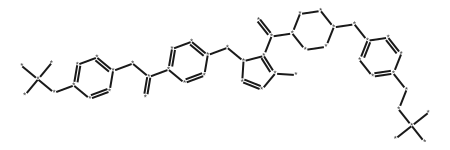

In [10]:
Chem.MolFromSmiles(sk)